# Statistics Tutorial - Lesson 6
# Probability Distribution

A [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution) is a mathemtical function to describe all the possible values and likelihoods that a random variable can take within a given range.

A probability distribution can be defined by its [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF). PDF is used to define the random variable's probability coming within a distinct range of values. On the other hands, a probability distribution can often be represented by a [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). CDF accumulates all of the probability less than or equal to x, i.e.
$$ CDF(x) = PDF(X \le x) = \sum_{i=min}^{x} PDF(i) $$

There are various probability distributions such as 
- Normal Distribution. It is the most commonly used continuous distribution for linear growth such as errors, offsets, etc.
- Binomial Distribution. For the number of "positive occurrences" given a fixed total number of independent occurrences.
- Geometric Distribution. For binomial-type observations but where the quantity of interest is the number of failures before the first success.
- Poisson distribution. For the number of occurrences of an event that occurs independently with a given rate in a given period of time.

In [1]:
###
# This example shows random variables to be represented by a histogram
# , which visually demonstrate its estimated probability density function.
###
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
from math import floor, ceil

# generate a sample
sample = normal(loc=50, scale=5, size=1000)

# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean={:.3f}, Standard Deviation={:.3f}'.format(sample_mean, sample_std))

Mean=49.875, Standard Deviation=4.946


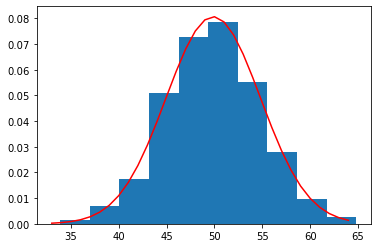

In [2]:
# define the distribution function
dist = norm(sample_mean, sample_std)

# sample probabilities for a range of outcomes
values = [value for value in range(floor(min(sample)), ceil(max(sample)))]
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities, c='r')
pyplot.show()

## Normal Distribution

[Normal Distrbution](https://en.wikipedia.org/wiki/Normal_distribution) or called Gaussian distribution is the most important in statistics. It is often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. It is defined as:

$$ PDF = \mathcal{N}(\mu, \sigma^{2}) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} $$

$$ CDF = \phi(x) = \frac{1}{2}(1 + erf(\frac{x-\mu}{\sigma\sqrt{2}})) $$
where erf is called [Error Function](https://en.wikipedia.org/wiki/Error_function), which is defined as 

$$ erf(z) = \frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-x^{2}}dx $$

In [6]:
# Example 2
# by SciPy
from scipy.stats import norm

x = 21
x1 = 20
x2 = 22
nd_mean = 20
nd_std = 2

prb_case1 = norm.pdf(x, loc=nd_mean, scale=nd_std)
prb_case2 = norm.cdf(x2, loc=nd_mean, scale=nd_std) - norm.cdf(x1, loc=nd_mean, scale=nd_std)
# Print results
print('Case 1: Probability(x={x}) = {p:.3f}'.format(x=x, p=prb_case1))
print('Case 2: Probability({x1} <= x <= {x2}) = {p:.3f}'.format(x1=x1, x2=x2, p=prb_case2))

Case 1: Probability(x=21) = 0.176
Case 2: Probability(20 <= x <= 22) = 0.341


## Central Limit Theorem

One of importances of Normal Distribution is [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) (CLT). It states that for a large enough samples, the distribution of the sample mean will approach normal distribution. This holds for a sample of independent random variables from any distribution with a finite standard deviation.

In [7]:
# Example
import math

# We have a sample of 100 values from a population with mean = 500, standard deviation = 80
# We are asked to calculate a lower bound L and an upper bound U when probability of X between L and U is 95%
# where z-score is 1.96
sample_size = 100
mean = 500
std = 80
prob = 0.95
z_score = 1.96

# Calculation
lower_bound = mean - (std/math.sqrt(sample_size)) * z_score
upper_bound = mean + (std/math.sqrt(sample_size)) * z_score

# Print result
print('P({l:.3f} <= x <= {u:.3f}) = {p}'.format(l=lower_bound, u=upper_bound, p=prob))

P(484.320 <= x <= 515.680) = 0.95


## Binomial Distribution

A [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is a probability distribution of a binomal experiment, aka [Bernoulli Trial](https://en.wikipedia.org/wiki/Bernoulli_trial). The experiment is conducted with:
- The experiment runs with n repeated trials.
- Each trial is independent.
- The outcome of each trial is boolean, i.e. either success or failure.
- The number of successes is x.
- The probability of success in each trial is p, thus that of failure is  (1-p).

With the above, we can have the [Probability Mass Function](https://en.wikipedia.org/wiki/Probability_mass_function) (PMF) as
$$ b(x, n, p) = \binom{n}{x}p^{x}(1-p)^{n-x} $$

and CDF as
$$ b(x \le k) = \sum_{i=0}^{k}b(x=i, n, p) $$

In [8]:
# Example 2
# by SciPy
from scipy.stats import binom

ticket_count = 10
defect_rate = 12/100.0
defect_threshold = 2

total_defect_rate = binom.cdf(defect_threshold, ticket_count, defect_rate)
print('Total Defect Rate in {cnt} tickets is {cdf:.3f}'.format(cnt=ticket_count, cdf=total_defect_rate))

Total Defect Rate in 10 tickets is 0.891


## Geometric Distribution

A [Geometric Distribution](https://en.wikipedia.org/wiki/Geometric_distribution) is a probability distribution of a binomal experiment as well. The experiment is conducted with:
- The experiment runs with n repeated trials.
- Each trial is independent.
- The outcome of each trial is boolean, i.e. either success or failure.
- The probability of success in each trial is p, thus that of failure is (1-p).
- The experiment continues until x successes are observed.

Geometric Distribution's PMF is
$$ g(x, p) = (1-p)^{(x-1)}(p) $$

CDF is
$$ P(X \le x) = 1 - (1-p)^{x} $$

In [8]:
# Example 1
# What is a probability of a programmer with 12% defect rate
# having the 1st defects in the first 10 tickets?

def get_gd_pmf(x, p):
    """
    Calculate Geometric Distribution Probability Mass Function
    """    
    return (1-p)**(x-1) * p

def get_gd_cdf_1(x, p):
    """
    Calculate Geometric Distribution Cumulative Distribution Function
    (Method 1)
    """       
    return sum([get_gd_pmf(i, p) for i in range(1, x+1, 1)])

def get_gd_cdf_2(x, p):
    """
    Calculate Geometric Distribution Cumulative Distribution Function
    (Method 2)
    """       
    return 1 - (1 - p)**x

ticket_count = 10
defect_rate = 12/100.0

rate1 = get_gd_cdf_1(ticket_count, defect_rate)
rate2 = get_gd_cdf_2(ticket_count, defect_rate)
print('Method 1: Rate of 1st defect in top {cnt} tickets is {cdf:.3f}'.format(cnt=ticket_count, cdf=rate1))
print('Method 2: Rate of 1st defect in top {cnt} tickets is {cdf:.3f}'.format(cnt=ticket_count, cdf=rate2))

Method 1: Rate of 1st defect in top 10 tickets is 0.721
Method 2: Rate of 1st defect in top 10 tickets is 0.721


In [9]:
# Example 2
# by SciPy
from scipy.stats import geom

rate1 = geom.cdf(ticket_count, defect_rate)
rate2 = geom.cdf(ticket_count, defect_rate)
print('Method 1: Rate of 1st defect in top {cnt} tickets is {cdf:.3f}'.format(cnt=ticket_count, cdf=rate1))
print('Method 2: Rate of 1st defect in top {cnt} tickets is {cdf:.3f}'.format(cnt=ticket_count, cdf=rate2))

Method 1: Rate of 1st defect in top 10 tickets is 0.721
Method 2: Rate of 1st defect in top 10 tickets is 0.721


## Poisson Distribution

A [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a probability distribution of a poisson experiment where the probability of a given number of events occurr in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

For example, a call centre receives 180 calls per hour in average. Each call is independent because receiving a call does not change the probability of when the next one will arrive. The number of calls received during any hour is in a Poisson probability distribution.

Poisson Distribution's PMF is
$$ P(k, l) = \frac{l^{k}e^{-l}}{k!} $$
where l is the average number of successes that occur in a specified region.
k is is the actual number of successes that occur in a specified region.

Poisson Distribution P(k, l) has the following properties:
- mean is l
- variance is l
- $E[X^{2}]$ is $l + l^{2} $

In [10]:
# Example 1
# If a call centre receives 180 calls per hour in average,
# what is the probability if it receives 240 calls per hour?
from math import factorial, exp

def get_poisson_pmf(k, lam):
    return (lam**k * exp(-lam))/factorial(int(k))

mean_calls = 180//60
target_calls = 240//60
prob = get_poisson_pmf(target_calls, mean_calls)
print('Probability of {t} calls per minute is {p:.3f}'.format(t=target_calls, p=prob))

Probability of 4 calls per minute is 0.168


In [11]:
# Example 2
# by SciPy
from scipy.stats import poisson
prob = poisson.pmf(target_calls, mean_calls)
print('Probability of {t} calls per minute is {p:.3f}'.format(t=target_calls, p=prob))

Probability of 4 calls per minute is 0.168
